In [3]:
#2015/01/23 added leveling in transformation (transformed data are saved after leveling).
#2015/01/13 from OP1S10_analysis
%reset
%pylab
from fit_cylinder import *
from pySurf.points import *
from calibrate_align import *
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
%qtconsole

## Settings

In [4]:
# 20150115 correct from 20140111 
#Markers are coordinate values read on positioning (x inverted wrt operator coordinates).
# Saved data have both x and y inverted wrt operator coordinates).
# We want to refer to sample cordinates on the glass=operator (for mandrel invert x),
# then:
#    - reference points on mandrel from CMM must be inverted only in x for 180 rotation aroun oa
#    - reference points on glass are inverted in x for machine->operator
#    - surface data must be inverted in x and y, same scaling for calibration.


#original multiplier before Op1S16 was (-1.,1.) for both markers. 
# Changed to get a better result, but I don't really understand the reason.
markers1=np.array([[62.52,-9.16],[55.03,-13.50],[7.91,32.89],[-11.13,-47.28],[-67.56,-7.94]])
markers1=markers1*np.array((1.,1.))
markers2=np.array([[-0.935,64.404],[3.348,57.679],[-42.893,9.760],[38.710,-7.826],[-0.110,-64.799]])
markers2=markers2*np.array((1.,1.))
gscale=(-1,-1,1)
mscale=(-1,-1,1)

In [5]:
#always run this
gfile=r'measure_data\2015_07_27\01_op1S16_xysurf_Height.txt'
cfile=r'measure_data\2015_05_20\04_mandrel09_xysurf_Height.txt'
outfolder='OP1S16' 
imsize=(281,3001)

## Alignment

In [6]:
# create logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

logfile=os.path.join(outfolder,'aligncal_log.txt')
if not(os.path.exists(os.path.dirname(logfile))):
    os.makedirs(os.path.dirname(logfile))

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
fh = logging.FileHandler(logfile)
fh.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)
fh.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)
logger.addHandler(fh)

In [7]:
trans=find_transform(markers1,markers2)


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
INFO:root:stdv of markers distance errors from barycenter: 0.443716589048
2015-08-27 13:53:28,977 - root - INFO - stdv of markers distance errors from barycenter: 0.443716589048
INFO:root:rotation angle (degrees): -91.0046780985 +-0.230883604265
2015-08-27 13:53:28,999 - root - INFO - rotation angle (degrees): -91.0046780985 +-0.230883604265
INFO:root:errors in markers position after rotations: 
[[ 0.21123979 -0.60026714]
 [ 0.02357702  0.08748366]
 [-0.66075873  0.09464397]
 [ 0.45071789  0.14001273]
 [-0.02477597  0.27812679]]
2015-08-27 13:53:29,007 - root - INFO - errors in markers position after rotations: 
[[ 0.21123979 -0.60026714]
 [ 0.02357702  0.08748366]
 [-0.66075873  0.09464397]
 [ 0.45071789  0.14001273]
 [-0.02477597  0.27812679

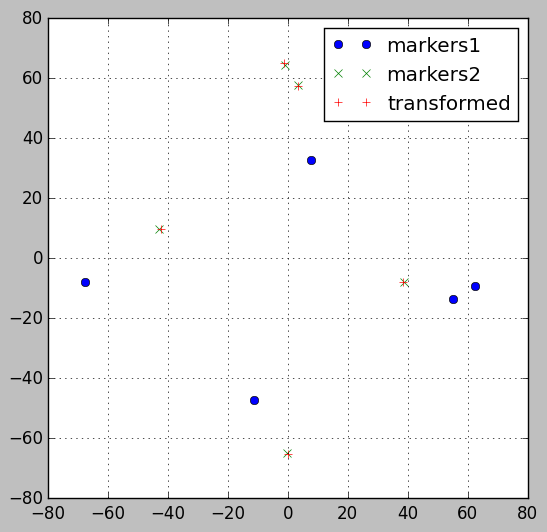

In [8]:
plt.clf()
plt.grid(1)
plt.gca().set_aspect('equal')
plt.plot(markers1[:,0],markers1[:,1],'o',label='markers1')
plt.plot(markers2[:,0],markers2[:,1],'x',label='markers2')
#m=find_transform(markers2,markers1)(markers2) #inverse transform
m=trans(markers1)
plt.plot(m[:,0],m[:,1],'+',label='transformed')
plt.legend(loc=0)
plt.show()
display(plt.gcf())

## Calibration

Sample data are calibrate for stage bending by subtracting data fome scan on flat mandrel. Can process more than one file in sequence. All settings are defined by settings file.

In [9]:
plt.close('all')

INFO:root:Glass data read from measure_data\2015_07_27\01_op1S16_xysurf_Intensity.txt
2015-08-05 14:38:15,216 - root - INFO - Glass data read from measure_data\2015_07_27\01_op1S16_xysurf_Intensity.txt
INFO:root:as (963321L, 3L) array.
2015-08-05 14:38:15,217 - root - INFO - as (963321L, 3L) array.
2015-08-05 14:38:15,220 - root - WARNING - calibration file not provided, skip calibration.
2015-08-05 14:38:15,437 - root - WARNING - Apply transformation to data points.


resampling...
resampling...

INFO:root:Plotting and saving data in OP1S16
2015-08-05 14:39:22,240 - root - INFO - Plotting and saving data in OP1S16


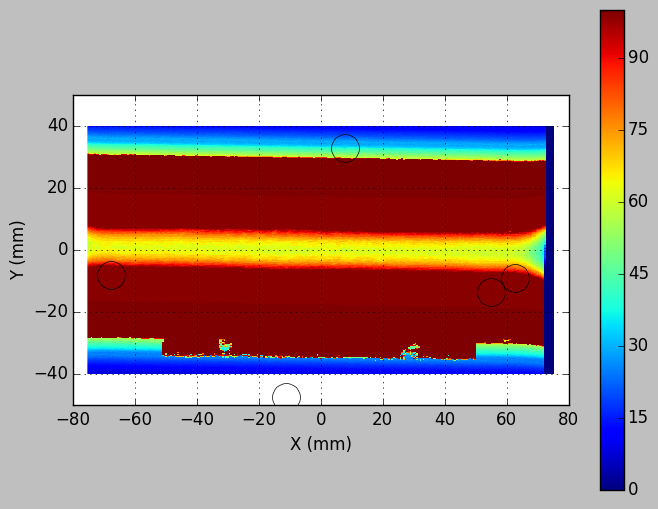

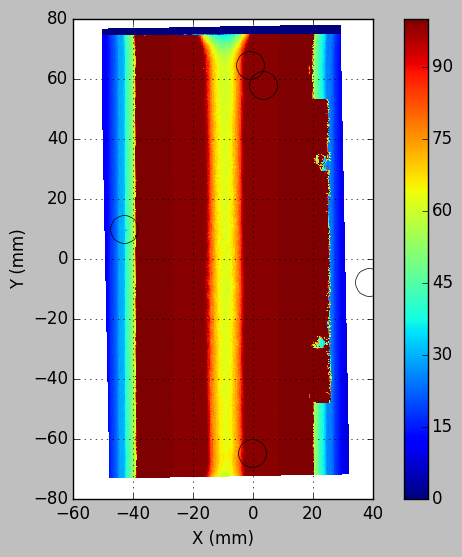

In [10]:
#verify the reference points position on intensity data
df=gfile.replace('Height','Intensity')
ip=calibrate_align(df, cfile=None,trans=trans,pshape=imsize, 
                   gscale=gscale,outfolder=outfolder,nolevel=1)
plt.figure('Original data')
plt.plot(markers1[:,0],markers1[:,1],'o',markerfacecolor='none', c='w',lw=20,markersize=20)
plt.figure('Transformed data')
plt.plot(markers2[:,0],markers2[:,1],'o',markerfacecolor='none', c='w',lw=20,markersize=20)
plt.savefig(os.path.join(outfolder,fn_add_subfix(os.path.basename(df),'','.png')))
#f=os.path.join(outfolder,fn_add_subfix(os.path.basename(df),'_transformed_matrix','.dat'))
#save_points(ip,f,shape=(281,2961),matrix=1,fill_value=-100.)
display(plt.figure('Original data'))
display(plt.figure('Transformed data'))

In [10]:
#here signs are put arbitrarily to aligh transformed cylinder. gscale and mscale must be the
#same
rpoints=calibrate_align(gfile, cfile,trans,imsize, outfolder,gscale=gscale,mscale=mscale)


INFO:root:Glass data read from measure_data\2015_07_27\01_op1S16_xysurf_Height.txt
2015-08-27 13:59:17,907 - root - INFO - Glass data read from measure_data\2015_07_27\01_op1S16_xysurf_Height.txt
INFO:root:as (963321L, 3L) array.
2015-08-27 13:59:17,908 - root - INFO - as (963321L, 3L) array.
INFO:root:calibration performed with data from file measure_data\2015_05_20\04_mandrel09_xysurf_Height.txt
2015-08-27 14:00:16,785 - root - INFO - calibration performed with data from file measure_data\2015_05_20\04_mandrel09_xysurf_Height.txt
INFO:root:as (1803601L, 3L) array.
2015-08-27 14:00:16,786 - root - INFO - as (1803601L, 3L) array.
2015-08-27 14:00:16,930 - root - WARNING - Apply transformation to data points.


resampling...
resampling...

INFO:root:Plotting and saving data in OP1S16
2015-08-27 14:01:27,698 - root - INFO - Plotting and saving data in OP1S16


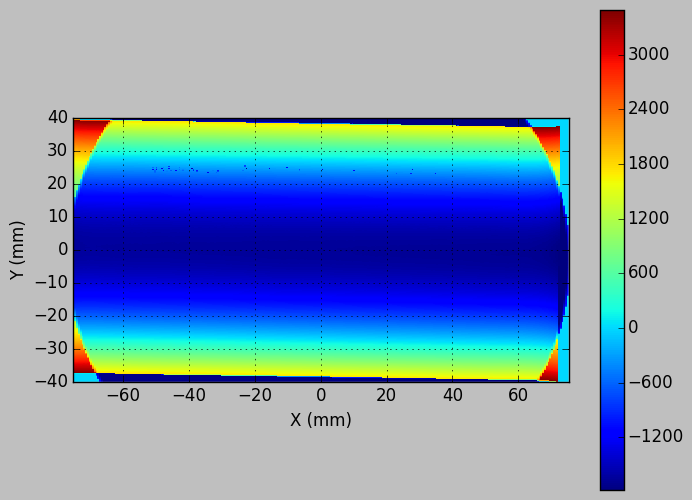

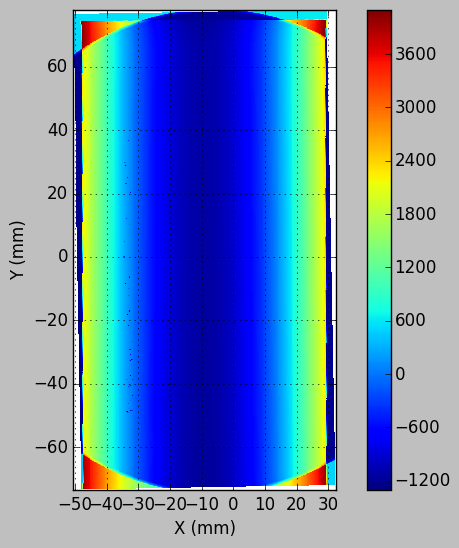

In [11]:
display(plt.figure('Original data'))
display(plt.figure('Transformed data'))

## Cone fit

In [12]:
fit_func=cone_error3 #function to be minimized
outSubfix='_cone' #the name of output file is the datafile with this subfix added
datafile='OP1S16/01_op1S16_xysurf_Height_transformed.dat' #datafile already calibrated and aligned
plotTitle='OP1S16'
def p(x): print x # callback function 
    #passed to minimization to print each step.

In [13]:
#create points to be fit from a subset of points.
pts=get_points(datafile,delimiter=' ')
pts[:,2]=pts[:,2]/1000.   #data are um, convert to mm before fit


In [14]:
pts=crop_points(pts,(-43,25),(-60,63))

#level plane
pts,pl=level_points(pts,returnPars=1)
pts[:,2]=pts[:,2]-pts[np.argsort(pts[:,2])[20],2]

c=crop_points(pts,(-43,25),(-50,50))    #[0:-1:1000,:]
odr2=(0,220.5,0,-np.sin(np.arctan(0.374/180*np.pi))) #use nominal value for guess direction
result=minimize(fit_func,x0=(odr2),
                args=(c,),options={'maxiter':500},method='Nelder-Mead')#,callback=p)
print '-----------------------------------'
print 'Results of fit on region:'
print result    
odr=result.x
fom,deltaR,coeff=fit_func(odr,c,extra=True)
print 'Angle of cone axis with y axis (deg):'
print np.arccos(np.sqrt(1-(odr[-2:]**2).sum()))*180/np.pi
print 'Cone parameters (angle(deg), R@y=0):'
print np.arctan(coeff[0])*180/np.pi,coeff[1]

-----------------------------------
Results of fit on region:
  status: 0
    nfev: 626
 success: True
     fun: 0.025006738531221082
       x: array([ -9.00158140e+00,   2.19471946e+02,  -1.54681137e-03,
        -2.30490017e-03])
 message: 'Optimization terminated successfully.'
     nit: 371
Angle of cone axis with y axis (deg):
0.159043114304
Cone parameters (angle(deg), R@y=0):
-0.131678342919 219.395796653


In [15]:
#create output results applying the value from fit to all points
fom,deltaR,coeff=fit_func(odr,pts,extra=True)
deltaR[:,2]=deltaR[:,2]*1000
print '-----------------------------------'
print 'Fit on subset is applied to complete set of points:'
print 'F.O.M.=%s'%(fom)


-----------------------------------
Fit on subset is applied to complete set of points:
F.O.M.=0.0226768245564


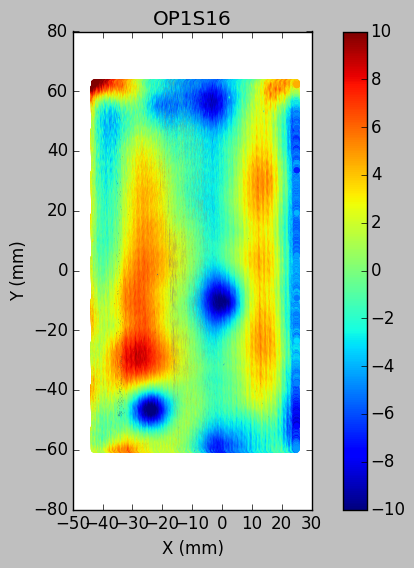

In [16]:
plt.figure(1)
plt.clf()
plot_points(deltaR,vmin=-10,vmax=10,scatter=1,aspect='equal')
plt.title(plotTitle)
display(plt.gcf())
save_points(deltaR,fn_add_subfix(datafile,'_deltaR','.dat'))
plt.savefig(fn_add_subfix(datafile,'_deltaR','.png'))

In [24]:
%qtconsole

In [17]:
np.std(deltaR[:,2])

22.676824556363083

In [18]:
#attempt fit on best region
c=crop_points(pts,(-43,20),(-39,61))    #[0:-1:1000,:]
odr2=(0,220.5,0,-np.sin(np.arctan(0.374/180*np.pi))) #use nominal value for guess direction
result=minimize(fit_func,x0=(odr2),
                args=(c,),options={'maxiter':500},method='Nelder-Mead')#,callback=p)
print '-----------------------------------'
print 'Results of fit on region:'
print result    
odr=result.x
fom,deltaR,coeff=fit_func(odr,c,extra=True)
print 'Angle of cone axis with y axis (deg):'
print np.arccos(np.sqrt(1-(odr[-2:]**2).sum()))*180/np.pi
print 'Cone parameters (angle(deg), R@y=0):'
print np.arctan(coeff[0])*180/np.pi,coeff[1]

-----------------------------------
Results of fit on region:
  status: 0
    nfev: 778
 success: True
     fun: 0.021181031759935885
       x: array([ -9.00276091e+00,   2.19276852e+02,  -1.73463119e-03,
        -7.16948511e-03])
 message: 'Optimization terminated successfully.'
     nit: 456
Angle of cone axis with y axis (deg):
0.422637256284
Cone parameters (angle(deg), R@y=0):
-0.407498324088 219.205736316


In [19]:
#refit subregion after removing of outliers and leveling
fom,deltaR,coeff=fit_func(odr,c,extra=True)
deltaR[:,2]=deltaR[:,2]*1000
#refine fit on subregion by 
#relevel on c:
pts,tmp=level_points(pts,returnPars=1)
print "plane for all pts: ",tmp
#c[:,2]=c[:,2]-c[np.argsort(c[:,2])[20],2]
#try to clip at 3 sigma, but it doesn't work, you cannot set to 0 need to set to c avg. nan gives error with polyfit:
#c[np.where(np.abs(deltaR[:,2])>3*np.std(deltaR[:,2])),2]
a=np.where(np.abs(deltaR[:,2]-deltaR[:,2].mean())>3*np.std(deltaR[:,2]))[0]
for aa in a:
    tmp=crop_points(c,c[aa,0]+(-1,1),c[aa,1]+(-1,1)) #cut on square of fixed size around outliers
    avg=(tmp[:,2].sum()-c[aa,2])/(size(tmp[:,2])-1)  #calculate average of other points
    c[aa,2]=avg
    
#redo plane
c,tmp=level_points(c,returnPars=1)
print "plane for central region: ",tmp
c[:,2]=c[:,2]-np.nanmin(c[:,2])

result=minimize(fit_func,x0=(odr),
                args=(c,),options={'maxiter':500},method='Nelder-Mead')#,callback=p)
print '-----------------------------------'
print 'Results of fit on region:'
print result    
odr=result.x
fom,deltaR,coeff=fit_func(odr,c,extra=True)
deltaR[:,2]=deltaR[:,2]*1000
print 'Angle of cone axis with y axis (deg):'
print np.arccos(np.sqrt(1-(odr[-2:]**2).sum()))*180/np.pi
print 'Cone parameters (angle(deg), R@y=0):'
print np.arctan(coeff[0])*180/np.pi,coeff[1]

plane for all pts:  [ -8.11882720e-16   4.64565387e-17   9.57755290e-01]
plane for central region:  [ -1.14019967e-02  -5.82422153e-05   7.17099260e-01]
-----------------------------------
Results of fit on region:
  status: 0
    nfev: 248
 success: True
     fun: 0.0026158934133140486
       x: array([ -1.14807221e+01,   2.19104958e+02,  -1.76494296e-03,
        -5.97003411e-03])
 message: 'Optimization terminated successfully.'
     nit: 141
Angle of cone axis with y axis (deg):
0.356694789748
Cone parameters (angle(deg), R@y=0):
-0.340770529566 219.101605101


In [27]:
plt.close('all')

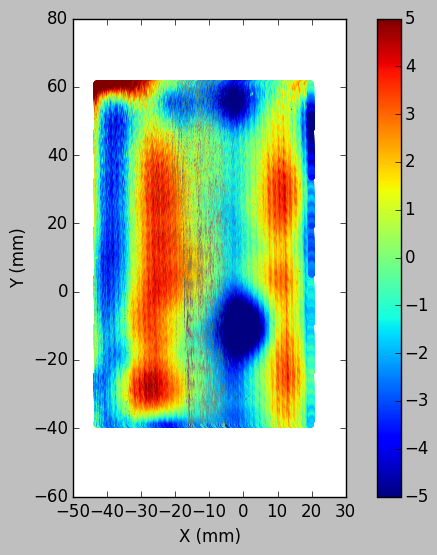

In [20]:
plt.figure(2)
plt.clf()
plot_points(deltaR,scatter=1,aspect='equal',vmin=-5,vmax=5)
display(plt.gcf())
save_points(deltaR,fn_add_subfix(datafile,'_deltaR_4inch','.dat'))
plt.savefig(fn_add_subfix(datafile,'_deltaR_4inch','.png'))

In [21]:
save_points(deltaR,fn_add_subfix(datafile,'_deltaR_4inch_matrix','.dat'),matrix=1,shape=(252,800))

In [26]:
from pyProfile.psd import psd